In [68]:

import pickle as pk
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import scipy as sc

import os


os.getcwd()

'/home/ubuntu/sandler_gpatlas_data/alphasimr'

In [69]:
#pickled captum feature ablation output
in_data = pk.load(open('gpatlas_out/g_p_attr_aggregated_pheno.pk','rb'))

#read in input into model to get labels of input features
#linear model reference
linear_mod = pd.read_csv('sim_2trait_jan02_eff2.txt', sep=' ')

#define sizes
n_loci = len(linear_mod)
n_pheno = 2


In [70]:

reshaped_data = np.array(in_data).reshape(-1, 2)
result = pd.DataFrame(reshaped_data, columns=['allele1', 'allele2'])
result = result.groupby(result.index % n_loci).mean() #average ablation effects over the 9 batches


result['total'] = result[['allele1', 'allele2']].min(axis=1)
print(result)

data_full = pd.concat([result, linear_mod], axis=1)
print(data_full.head())

       allele1   allele2     total
0    -0.017641 -0.002092 -0.017641
1     0.003139  0.000081  0.000081
2    -0.001412  0.000508 -0.001412
3     0.005195 -0.000667 -0.000667
4     0.002068 -0.000727 -0.000727
...        ...       ...       ...
4202 -0.005559  0.000062 -0.005559
4203  0.003751  0.000542  0.000542
4204  0.003451  0.000064  0.000064
4205 -0.002404  0.000000 -0.002404
4206  0.007761  0.000708  0.000708

[4207 rows x 3 columns]
    allele1   allele2     total  locus   add_eff  epi_loc   epi_eff       sfs
0 -0.017641 -0.002092 -0.017641      1  0.000000     41.0 -0.166936  0.313667
1  0.003139  0.000081  0.000081      2  0.000000     42.0  0.330392  0.003000
2 -0.001412  0.000508 -0.001412      3  0.000000    624.0  0.154208  0.041667
3  0.005195 -0.000667 -0.000667      4  0.000000    903.0  0.002112  0.456333
4  0.002068 -0.000727 -0.000727      5 -0.007634    379.0  0.178511  0.008667


Text(0.5, 0, 'feature_ablation_allele1')

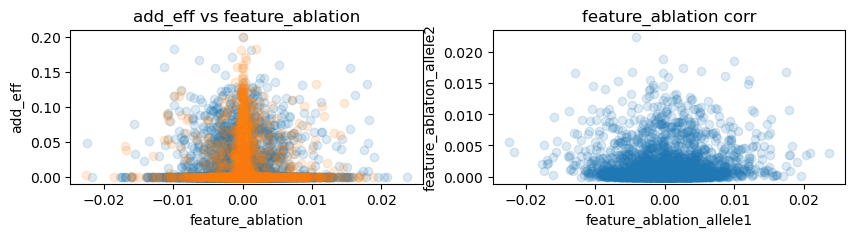

In [71]:

plt.figure(figsize=(10, n_pheno))


plt.subplot(1, n_pheno, 1)  # row 1, column 2, count 1
plt.scatter(data_full['allele1'], abs(data_full['add_eff']),alpha=0.15)

plt.subplot(1, n_pheno, 1)  # row 1, column 2, count 1
plt.scatter(data_full['allele2'], abs(data_full['add_eff']),alpha=0.15)
plt.title('add_eff vs feature_ablation')
plt.ylabel("add_eff")
plt.xlabel("feature_ablation")

plt.subplot(1, n_pheno, 2)  # row 1, column 2, count 1
plt.scatter(data_full['allele1'], abs(data_full['allele2']),alpha=0.15)
plt.title('feature_ablation corr')
plt.ylabel("feature_ablation_allele2")
plt.xlabel("feature_ablation_allele1")


Text(0.5, 0, 'feature_ablation')

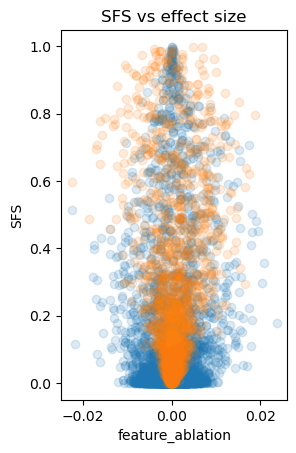

In [72]:
plt.subplot(1, n_pheno, 1)  # row 1, column 2, count 1
plt.scatter(data_full['allele1'], abs(data_full['sfs']),alpha=0.15)
#plt.title('allele1')

plt.subplot(1, n_pheno, 1)  # row 1, column 2, count 1
plt.scatter(data_full['allele2'], abs(data_full['sfs']),alpha=0.15)

#plt.subplot(1, n_pheno, 1)  # row 1, column 2, count 1
#plt.scatter(data_full['add_eff'], abs(data_full['sfs']),alpha=0.15)
plt.title('SFS vs effect size')
plt.ylabel("SFS")
plt.xlabel("feature_ablation")


Text(0.5, 0, 'real')

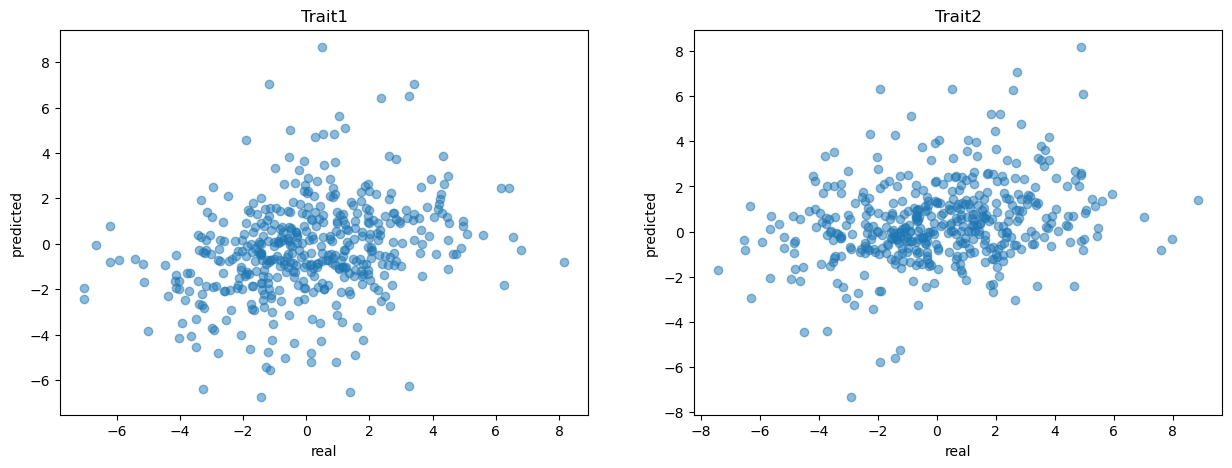

In [73]:


#phenotypes, phenotype encodings and pheno latent from G-P model
#can use to visualuze latent space
in_data3 = pk.load(open("gpatlas_out/phens_phen_encodings_dng_gp.pk",'rb'))


raw_pheno = pd.DataFrame(in_data3[0].T, columns=['Trait1', 'Trait2'])
pred_pheno = pd.DataFrame(in_data3[1].T, columns=['Trait1', 'Trait2'])



plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)  # row 1, column 2, count 1
plt.scatter(raw_pheno['Trait1'], pred_pheno['Trait1'],alpha=0.5)
plt.title('Trait1')
plt.ylabel("predicted")
plt.xlabel("real")


plt.subplot(1, 2, 2)  # row 1, column 2, count 1
plt.scatter(raw_pheno['Trait2'], pred_pheno['Trait2'],alpha=0.5)
plt.title('Trait2')
plt.ylabel("predicted")
plt.xlabel("real")


In [74]:

r_squared = r2_score(raw_pheno["Trait1"], pred_pheno["Trait1"])
print(r_squared, "Trait1")

r_squared = r2_score(raw_pheno["Trait2"], pred_pheno["Trait2"])
print(r_squared, "Trait2")


from scipy.stats import pearsonr
r, _ = pearsonr(raw_pheno["Trait1"], pred_pheno["Trait1"])
r_squared = r**2
print(r, "Trait1")


r, _ = pearsonr(raw_pheno["Trait2"], pred_pheno["Trait2"])
r_squared = r
print(r, "Trait2")


-0.28505563735961914 Trait1
-0.11762630939483643 Trait2
0.2881079531221644 Trait1
0.26347168059402293 Trait2


In [75]:
result_sep = pk.load(open('feature_ablation_summary_per_pheno.pk','rb'))
result_sep

column,0,1
row_index,,
0,-0.012975,-0.006758
1,0.002938,0.000282
2,0.000418,-0.001322
3,0.007737,-0.003208
4,-0.002646,0.003987
...,...,...
4202,-0.007402,0.001905
4203,0.007933,-0.003639
4204,0.000462,0.003053


PearsonRResult(statistic=0.6242129696715427, pvalue=0.0) Trait1 Allele1
PearsonRResult(statistic=0.2953238190668944, pvalue=1.9600195755753697e-85) Trait1 Allele2
PearsonRResult(statistic=0.6242129696715427, pvalue=0.0) Trait2 Allele1
PearsonRResult(statistic=0.2953238190668944, pvalue=1.9600195755753697e-85) Trait2 Allele2


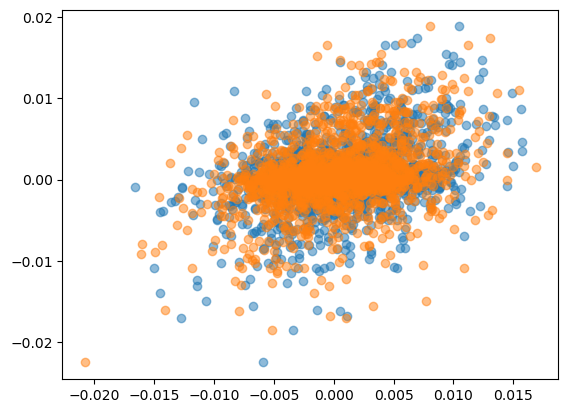

In [76]:
result_sep = pk.load(open('feature_ablation_summary_per_pheno.pk','rb'))

plt.scatter(result_sep[0], data_full['allele2'],alpha=0.5)
plt.scatter(result_sep[1], data_full['allele2'],alpha=0.5)


r_squared = pearsonr(result_sep[0], data_full['allele1'])
print(r_squared, "Trait1 Allele1")

r_squared = pearsonr(result_sep[0], data_full['allele2'])
print(r_squared, "Trait1 Allele2")

r_squared = pearsonr(result_sep[0], data_full['allele1'])
print(r_squared, "Trait2 Allele1")

r_squared = pearsonr(result_sep[0], data_full['allele2'])
print(r_squared, "Trait2 Allele2")
